In [33]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import scipy.sparse.csgraph as grph
from sklearn.metrics import silhouette_score,adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

# Collection of data

In [2]:
data = pd.read_csv("mcdonalds.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
df= data.copy()

# Exploring Data

## Names of features

In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.shape

(1453, 15)

In [6]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [7]:
df.head(11)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [8]:
mat = df.iloc[:,0:11]
mat = (mat=='Yes') + 0
round(mat.mean(),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

- 55% perceive McDonald’s as YUMMY
- 91% believe that eating at McDonald’s is CONVENIENT
- only 9% think that McDonald’s food is SPICY

## PCA

In [9]:
pca = PCA()
array_pca = pca.fit_transform(mat)
feat_name = ['PCA'+str(i) for i in range(mat.shape[1])]
df_pca = pd.DataFrame(data = array_pca, columns=feat_name)
df_pca

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [10]:
df_pca.describe()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,1.146135e-17,1.142315e-17,-5.226138e-17,-3.268396e-17,3.935064e-17,-4.183394e-17,4.059229e-17,-2.131812e-17,-1.251198e-17,7.029630e-17,1.665717e-17
std,7.570495e-01,6.074556e-01,5.046195e-01,3.987986e-01,3.374050e-01,3.102746e-01,2.896973e-01,2.751220e-01,2.652511e-01,2.488418e-01,2.369028e-01
min,-1.188421e+00,-1.040274e+00,-8.808133e-01,-5.906209e-01,-1.045938e+00,-8.524911e-01,-8.059463e-01,-9.316201e-01,-9.557606e-01,-8.871971e-01,-8.851439e-01
25%,-5.476794e-01,-3.568482e-01,-4.507793e-01,-2.814986e-01,-2.433247e-01,-1.927027e-01,-1.342190e-01,-1.717258e-01,-1.181233e-01,-1.465751e-01,-1.053163e-01
50%,-7.074592e-02,-1.151632e-01,2.687734e-02,-1.163200e-01,3.348785e-02,-3.460184e-02,-6.366220e-02,-3.475619e-02,3.868061e-02,3.020635e-02,-1.201409e-02
75%,4.933012e-01,3.915540e-01,3.515939e-01,2.702298e-01,2.048293e-01,1.747453e-01,2.318357e-02,1.295966e-01,7.987794e-02,7.001416e-02,8.554080e-02
max,1.705573e+00,1.279130e+00,1.326976e+00,1.355278e+00,1.053327e+00,1.323793e+00,1.350886e+00,1.121388e+00,1.086693e+00,1.181524e+00,9.255829e-01


Results from principal components analysis indicate that the first two components
capture about 50% of the information contained in the segmentation variables

In [11]:
def std_dev(data):
    std_dev = data.std()
    return std_dev
def variance (data):
    var = data.var()
    return var
def cumm_pr(data):
    cu_pr = data.cumsum()
    sum_dt = data.sum()
    cum_pr = cu_pr/sum_dt
    return cum_pr

In [12]:
# df_summary = pd.DataFrame({i : std_dev(df_pca[i]) for i in list(df_pca.columns)})

In [13]:
fact_loading = pca.components_.T * np.sqrt(pca.explained_variance_)
fact_loading = pd.DataFrame(fact_loading,index = list(df.columns[:11]),columns= list(df_pca.columns))
fact_loading

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
yummy,-0.361062,0.220986,-0.153628,0.021999,-0.103764,0.052976,-0.081265,0.003588,0.151830,-0.027443,0.010765
convenient,-0.117594,0.009971,-0.031546,-0.056799,0.093666,-0.107923,-0.017306,-0.031110,-0.004898,-0.165683,-0.128310
spicy,-0.004812,0.011425,-0.018680,0.078810,0.023828,-0.110174,0.205001,0.103428,0.106175,-0.018821,0.033576
fattening,0.087993,-0.020711,-0.162669,-0.141230,-0.024767,-0.126131,-0.111807,0.162218,-0.042576,-0.001328,0.059441
greasy,0.230478,-0.038779,-0.404893,0.101279,0.121938,0.064955,0.010478,-0.038033,-0.000755,0.002167,0.000389
fast,-0.082135,-0.052832,-0.032619,-0.038828,0.036416,-0.184499,-0.025159,-0.172721,0.044084,0.059606,0.080373
cheap,-0.255266,-0.370932,-0.075345,0.047440,-0.043516,-0.032033,-0.011718,0.038534,0.020177,0.106526,-0.115912
tasty,-0.356959,0.186682,-0.144959,-0.001016,-0.071158,-0.023865,0.104422,-0.020027,-0.169518,0.019704,0.004632
expensive,0.249101,0.365255,0.012311,0.027045,-0.001054,-0.081088,-0.019811,0.008127,0.017771,0.113074,-0.116099
healthy,-0.161790,0.046527,0.096913,0.304478,0.097121,-0.055299,-0.101283,0.048505,-0.049223,-0.009485,0.037338


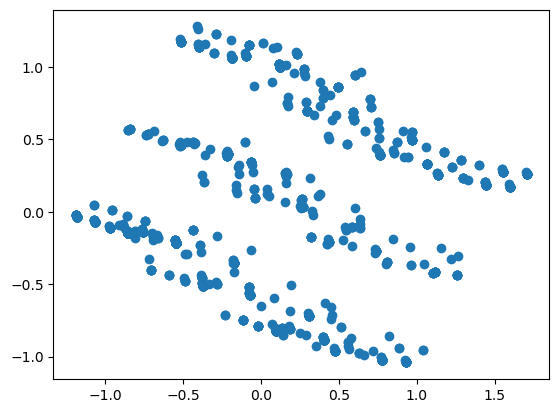

In [14]:
plt.scatter(df_pca['PCA0'],df_pca['PCA1'])

# Step 5: Extracting Segments

Step 5 is where we extract segments. To illustrate a range of extraction techniques,
we subdivide this step into three sections. In the first section, we will use standard
k-means analysis. In the second section, we will use finite mixtures of binary
distributions. In the third section, we will use finite mixtures of regressions.

## 5.1 Using k-Means

Best numbers of cluster 8 and Silhouette score: 0.29004321456080184


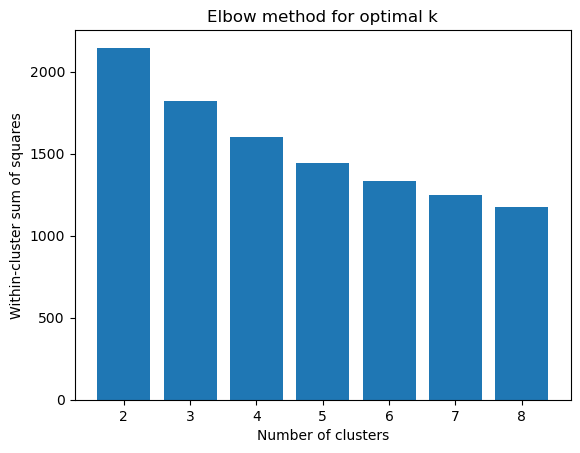

In [17]:
silhouette_scores = []
wss_values = []
krange = range(2,9)
for k in krange:
    k_means = KMeans(n_clusters=k,random_state=1234,n_init=10)
    k_means.fit(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, k_means.labels_))
    labels = k_means.labels_
    centroid = k_means.cluster_centers_
    wss_values.append(k_means.inertia_)
    
    
indx_bst_score = np.argmax(silhouette_scores)
print(f"Best numbers of cluster {krange[indx_bst_score]} and Silhouette score: {silhouette_scores[indx_bst_score]}")
plt.bar(krange, wss_values)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow method for optimal k')
plt.show()

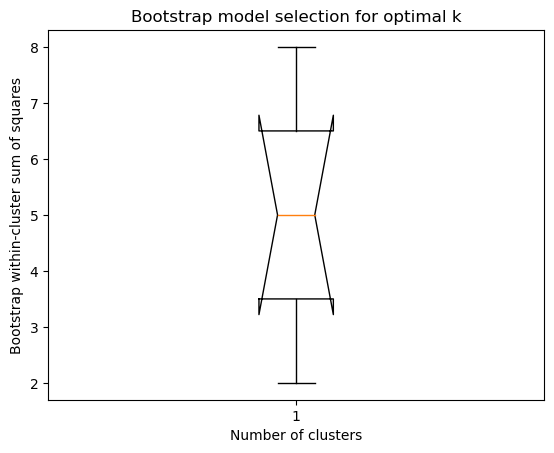

In [18]:
n_boot = 100
boot_wss = []
for k in krange:
    wss_val = []
    for i in range(n_boot):
        bootstrap_sample = df_pca.sample(n=len(df_pca), replace=True)
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
        kmeans.fit(bootstrap_sample)
        wss_values.append(kmeans.inertia_)
    boot_wss.append(np.median(wss_values))
plt.boxplot(krange, boot_wss)
plt.xlabel('Number of clusters')
plt.ylabel('Bootstrap within-cluster sum of squares')
plt.title('Bootstrap model selection for optimal k')
plt.show()

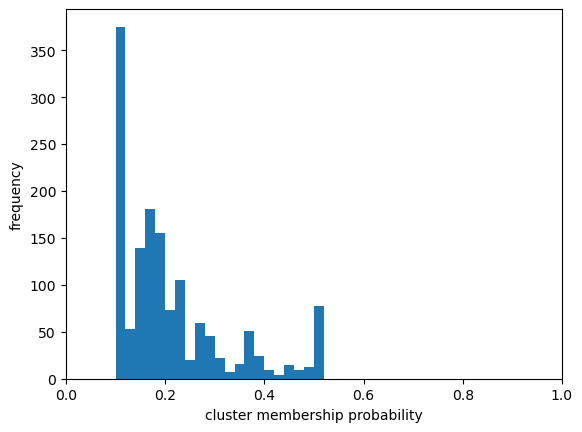

In [30]:
kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(df_pca) for k in range(2, 9)]

# Get the cluster membership probabilities for cluster 4
distances = kmeans_models[2].transform(df_pca)
probs = np.exp(-distances[:, 3]) / np.sum(np.exp(-distances), axis=1)

# Plot a histogram of the cluster membership probabilities for cluster 4
plt.hist(probs, bins=50, range=(0, 1))
plt.xlim(0, 1)
plt.xlabel("cluster membership probability")
plt.ylabel("frequency")
plt.show()

In [34]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(df_pca)

n_perturbations = 10
n_samples = df_pca.shape[0]
segment_stabilities = np.zeros(k)

for i in range(n_perturbations):
    # Perturb the data by adding some Gaussian noise
    perturbed_data = df_pca + np.random.normal(0, 0.1, size=df_pca.shape)
    # Re-run the clustering algorithm on the perturbed data
    new_labels = kmeans.fit_predict(perturbed_data)
    # Calculate the adjusted Rand index between the original labels and the new labels
    aris = [adjusted_rand_score(labels, new_labels)]
    for j in range(1, k):
        segment_mask = labels == j
        new_segment_mask = new_labels == j
        segment_overlap = np.sum(segment_mask & new_segment_mask) / np.sum(segment_mask | new_segment_mask)
        aris.append(segment_overlap)
    segment_stabilities += aris

segment_stabilities /= n_perturbations + 1

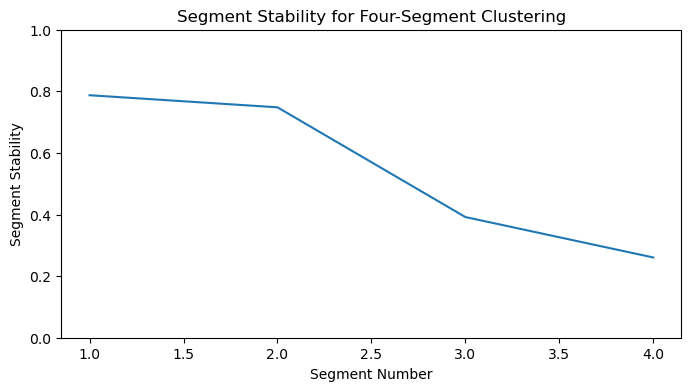

In [39]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(range(1, len(segment_stabilities)+1), segment_stabilities)
ax.set_xlabel('Segment Number')
ax.set_ylabel('Segment Stability')
ax.set_ylim(0, 1)
ax.set_title('Segment Stability for Four-Segment Clustering')
plt.show()

## 5.2 Using Mixtures of Distributions